<a href="https://colab.research.google.com/github/Shrilekhya/MachineLearning/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

# New Section

In [2]:
car_data = pd.read_csv('/content/car_data.csv')

In [3]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
car_data = pd.get_dummies(car_data, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

In [6]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


<ipython-input-7-cf61974a0a4d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(), annot = True)


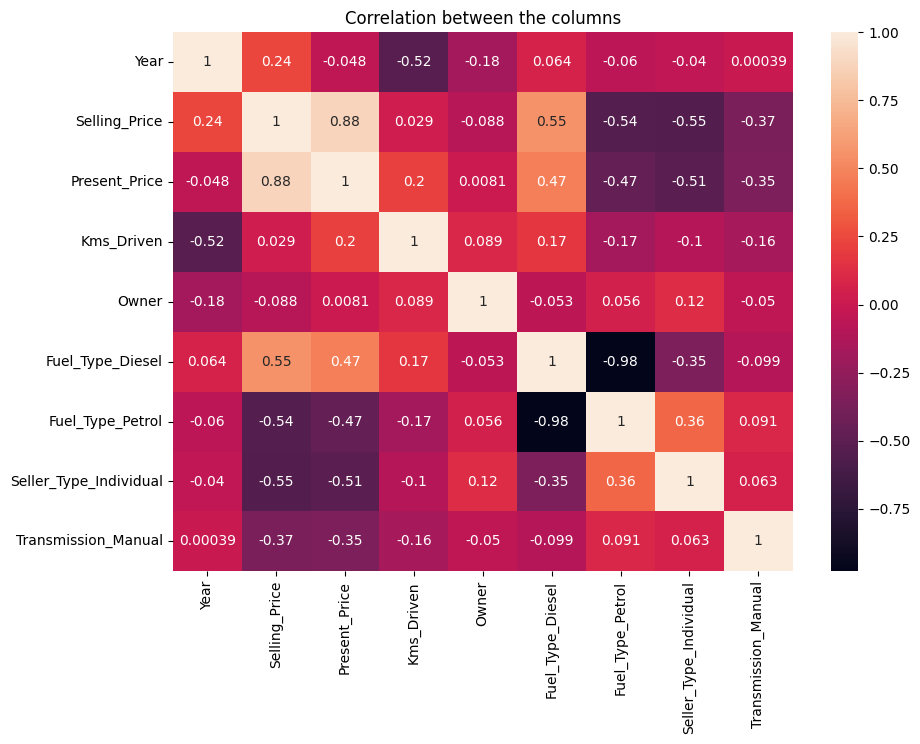

In [7]:
plt.figure(figsize = (10,7))
sns.heatmap(car_data.corr(), annot = True)
plt.title('Correlation between the columns')
plt.show()

<Axes: title={'center': 'Correlation between present_price and selling_price'}, xlabel='Present_Price', ylabel='Selling_Price'>

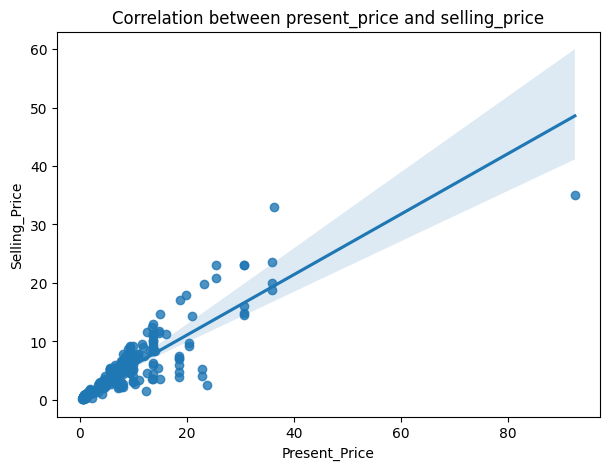

In [8]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between present_price and selling_price')
sns.regplot(x='Present_Price', y='Selling_Price', data=car_data)

In [9]:
X = car_data.drop(['Car_Name', 'Selling_Price'], axis=1)
y = car_data['Selling_Price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [11]:
X_train.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
258,2015,13.60,25000,0,0,1,0,1
123,2013,1.47,46500,0,0,1,1,1
228,2012,9.40,60000,0,1,0,0,1
82,2017,25.39,15000,0,1,0,0,0
218,2014,9.40,45078,0,0,1,0,1


In [14]:
scalar = StandardScaler()

In [15]:
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[-0.61235828,  1.66290474,  0.83101517, -0.19618312, -0.49348082,
         0.5       , -0.7677265 ,  0.37796447],
       [ 0.80077621, -0.93599288, -0.14173377, -0.19618312, -0.49348082,
         0.5       ,  1.3025472 ,  0.37796447],
       [-1.31892553,  1.92768722,  0.30962174, -0.19618312,  2.02642122,
        -2.        , -0.7677265 ,  0.37796447],
       [-0.61235828, -0.35318361, -0.02844411, -0.19618312, -0.49348082,
         0.5       , -0.7677265 ,  0.37796447],
       [-0.96564191, -0.35318361, -0.3429979 , -0.19618312, -0.49348082,
         0.5       , -0.7677265 ,  0.37796447],
       [-1.67220915,  1.14916916,  0.783564  , -0.19618312, -0.49348082,
         0.5       , -0.7677265 , -2.64575131],
       [ 0.80077621,  0.94194809, -0.14759399, -0.19618312, -0.49348082,
         0.5       , -0.7677265 , -2.64575131],
       [-1.67220915, -0.76330865,  0.07179648, -0.19618312, -0.49348082,
         0.5       ,  1.3025472 ,  0.37796447],
       [ 0.09420897,  0.71745859

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
pred = model.predict(X_test)

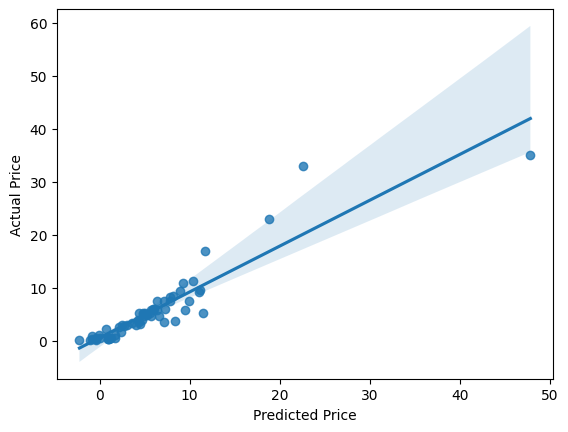

In [22]:
sns.regplot(x = pred, y = y_test)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.show()